
# 7.8: Parallelism: Using the MPI backend

This example demonstrates how to use the MPI backend for simulating dipoles using `hnn_core`.

`hnn_core` can take advantage of MPI libraries such as [OpenMPI](https://www.open-mpi.org/) to run a **single** simulation using **multiple** CPU processors. MPI lets you divide parts of your simulated network across CPUs while allowing the CPUs to "talk" to each other, and can therefore enable *significant* speed-up of individual simulations.

Note that to use MPI parallelism, you need either the `conda` install **or** the `MPI Installation` dependencies described [in our Installation Guide here](https://jonescompneurolab.github.io/hnn-core/dev/install.html).

Note that MPI parallelism is distinct from `hnn_core`'s use of [Joblib parallelism, which can be found here](https://jonescompneurolab.github.io/textbook/content/04_using_hnn/parallelism_joblib.html).

In [1]:
# Authors: Mainak Jas <mjas@mgh.harvard.edu>
#          Blake Caldwell <blake_caldwell@brown.edu>
#          Austin Soplata <austin_soplata@brown.edu>

Let us import what we need from `hnn_core`:

In [2]:
import matplotlib.pyplot as plt

from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole

Following our [Alpha example](https://jonescompneurolab.github.io/textbook/content/06_alpha_beta/api.html), we will create our network and add a ~10 Hz "bursty" drive:

In [3]:
net = jones_2009_model()

weights_ampa = {'L2_pyramidal': 5.4e-5, 'L5_pyramidal': 5.4e-5}
net.add_bursty_drive(
    'bursty', tstart=50., burst_rate=10, burst_std=20., numspikes=2,
    spike_isi=10, n_drive_cells=10, location='distal',
    weights_ampa=weights_ampa, event_seed=278)

Finally, we will simulate using the
[`MPIBackend` class](https://jonescompneurolab.github.io/hnn-core/stable/generated/hnn_core.parallel_backends.MPIBackend.html#hnn_core.parallel_backends.MPIBackend). This will start the simulation across the number of processors (cores) specified by `n_procs` using MPI.

In [4]:
from hnn_core import MPIBackend

with MPIBackend(n_procs=4, mpi_cmd='mpiexec'):
    dpls = simulate_dipole(net, tstop=210., n_trials=1)

MPI will run 1 trial(s) sequentially by distributing network neurons over 4 processes.
/opt/anaconda3/envs/website-redesign-mpi/bin/nrniv:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/opt/anaconda3/envs/website-redesign-mpi/bin/nrniv:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/opt/anaconda3/envs/website-redesign-mpi/bin/nrniv:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
/opt/anaconda3/envs/website-redesign-mpi/bin/nrniv:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
numprocs=4
Loading custom mechanism files from /opt/anaco

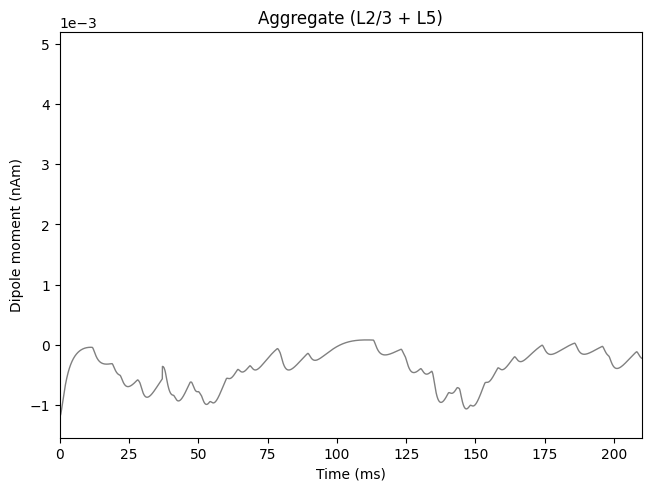

In [5]:
plot_dipole(dpls, show=False)
plt.show()